In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

x_train = pd.read_csv('X_train.csv', header = None)
x_test = pd.read_csv('X_test.csv', header = None)
y_train = pd.read_csv('y_train.csv', header = None)
y_test = pd.read_csv('y_test.csv', header = None)





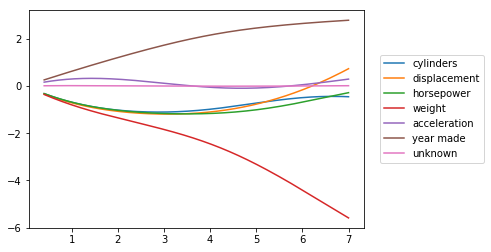

In [18]:
#Part 1 (a)
col_n = len(x_train.columns)
I = np.identity(col_n)
w_data = np.zeros(shape=(5001,col_n))
df_list = np.zeros(shape=(5001,))
for l in range(5001):
    u, s, vh = np.linalg.svd(x_train,full_matrices = True)
    x_trans_x=vh.transpose()@np.power(np.diag(s), 2)@vh
    inver = np.linalg.inv(l*I+x_trans_x)
    w_rr = inver@x_train.transpose()@y_train
    w_data[l] = w_rr.transpose()
    df=np.trace(x_train@inver@x_train.transpose())
    df_list[l] = df


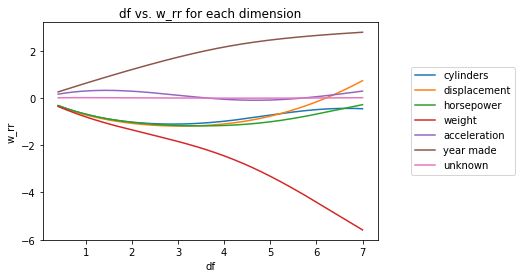

In [109]:
#plot
labels = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year made', 'unknown']
for i in range(len(labels)):
    plt.plot(df_list, w_data[:,i], label=labels[i])
plt.legend(loc=(1.1,0.3))
plt.xlabel('df')
plt.ylabel('w_rr')
plt.title('df vs. w_rr for each dimension')
plt.show()

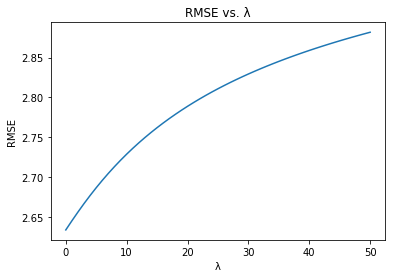

In [81]:
#Part 1 (c)
test_size = x_test.shape[0]
rmse = []
for l in range(100):
    y_pred = x_test @ w_data[l].T
    rmse.append(np.sqrt(np.sum((np.array(y_pred)-y_test.T.values)**2)/test_size))
plt.plot(np.arange(51), rmse[0:51])
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.title('RMSE vs. λ')
plt.show()

In [98]:
#Part 2_d
## for 2nd-order
x_train_2 = x_train.copy()
x_test_2 = x_test.copy()
#adding the 2nd-order parameters
for i in range(col_n):
    x_train_2[col_n + i] = x_train_2[i]**2
    x_test_2[col_n + i] = x_test_2[i]**2
## standardize
for i in range(col_n-1):
    train_mean = np.mean(x_train_2.iloc[:,i+col_n])
    train_std = np.std(x_train_2.iloc[:,i+col_n])
    x_train_2.iloc[:,i+col_n] = (x_train_2.iloc[:,i+col_n] - train_mean) / train_std
    x_test_2.iloc[:,i+col_n] = (x_test_2.iloc[:,i+col_n] - train_mean) / train_std
# learning w_rr ofr 2nd-order
col_n_2=x_train_2.shape[1]
row_n_2=x_train_2.shape[0] 
I_2 = np.identity(col_n_2) 
w_data_2 = np.zeros(shape=(row_n_2,col_n_2))
df_list_2 = np.zeros(shape=(row_n_2,))
for l in range(row_n_2):
    u, s, vh = np.linalg.svd(x_train_2,full_matrices = True)
    x_trans_x=vh.transpose()@np.power(np.diag(s), 2)@vh
    inver = np.linalg.inv(l*I_2+x_trans_x)
    w_rr = inver@x_train_2.transpose()@y_train
    w_data_2[l] = w_rr.transpose()

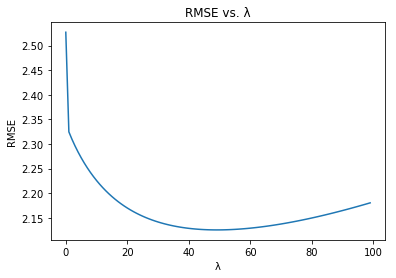

In [99]:
#calculating rmse for 2nd-order
rmse_2 = []
for l in range(100):
    y_pred_2 = x_test_2 @ w_data_2[l].T
    rmse_2.append(np.sqrt(np.sum((np.array(y_pred_2)-y_test.T.values)**2)/test_size))

In [100]:
## for 3rd-order
x_train_3 = x_train_2.copy()
x_test_3 = x_test_2.copy()
#adding the 3nd-order parameters
for i in range(col_n):
    x_train_3[col_n_2 + i] = x_train[i]**3
    x_test_3[col_n_2 + i] = x_test[i]**3
## standardize
for i in range(col_n-1):
    train_mean = np.mean(x_train_3.iloc[:,i+col_n_2])
    train_std = np.std(x_train_3.iloc[:,i+col_n_2])
    x_train_3.iloc[:,i+col_n_2] = (x_train_3.iloc[:,i+col_n_2] - train_mean) / train_std
    x_test_3.iloc[:,i+col_n_2] = (x_test_3.iloc[:,i+col_n_2] - train_mean) / train_std
# learning w_rr ofr 3rd-order
col_n_3=x_train_3.shape[1]
row_n_3=x_train_3.shape[0] 
I_3 = np.identity(col_n_3) 
w_data_3 = np.zeros(shape=(row_n_3,col_n_3))
df_list_3 = np.zeros(shape=(row_n_3,))
for l in range(row_n_3):
    u, s, vh = np.linalg.svd(x_train_3,full_matrices = True)
    x_trans_x=vh.transpose()@np.power(np.diag(s), 2)@vh
    inver = np.linalg.inv(l*I_3+x_trans_x)
    w_rr = inver@x_train_3.transpose()@y_train
    w_data_3[l] = w_rr.transpose()

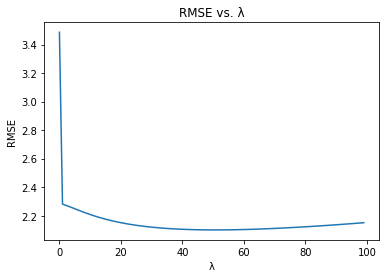

In [101]:
#Calculating RMSE for 3rd-order
rmse_3 = []
for l in range(100):
    y_pred_3 = x_test_3 @ w_data_3[l].T
    rmse_3.append(np.sqrt(np.sum((np.array(y_pred_3)-y_test.T.values)**2)/test_size))

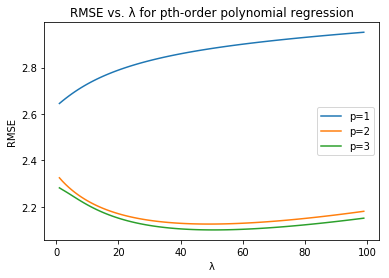

In [108]:
plt.plot(np.arange(1,100), rmse[1:100], label='p=1')
plt.plot(np.arange(1,100), rmse_2[1:100], label='p=2')
plt.plot(np.arange(1,100), rmse_3[1:100],label='p=3') 
plt.legend() 
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.title('RMSE vs. λ for pth-order polynomial regression')
plt.show()